# Classification Experiments

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np

## Gender

### Nouns, Adjectives, Both : split data into train and test  

In [198]:
df_nouns_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gn"])
df_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns = "number")
df_both_we = pd.concat([df_nouns_we, df_adj_we], ignore_index=True)

# target : gender
Y_gd_N = df_nouns_we["gender"]
Y_gd_A = df_adj_we["gender"]
Y_gd_both = df_both_we["gender"]

# features : word embeddings dimensions
X_gd_N = df_nouns_we.drop(columns=["Word", "gender"])
X_gd_A = df_adj_we.drop(columns=["Word", "gender"])
X_gd_both = df_both_we.drop(columns = ["Word", "gender"] )

# split data into train and test sets
X_gd_N_train, X_gd_N_test, Y_gd_N_train, Y_gd_N_test = train_test_split(X_gd_N, Y_gd_N, test_size=0.2, random_state=42)
X_gd_A_train, X_gd_A_test, Y_gd_A_train, Y_gd_A_test = train_test_split(X_gd_A, Y_gd_A, test_size=0.2, random_state=42)
X_gd_both_train, X_gd_both_test, Y_gd_both_train, Y_gd_both_test = train_test_split(X_gd_both, Y_gd_both, test_size=0.2, random_state=42)

In [4]:
train_features = [X_gd_N_train, X_gd_A_train, X_gd_both_train]
test_features = [X_gd_N_test, X_gd_A_test, X_gd_both_test]
train_targets = [Y_gd_N_train, Y_gd_A_train, Y_gd_both_train]
test_targets = [Y_gd_N_test, Y_gd_A_test, Y_gd_both_test]

###  Classifiers

#### 1. Decision Tree

In [5]:
# Execution time: ~30 sec

results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Add the tree
    results[i]["tree"] = clf

    # Compute precision, recall, F1 score and accuracy
    results[i]["precision"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][1,0])
    results[i]["recall"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][0,1])
    results[i]["f1"] = 2 * results[i]["precision"] * results[i]["recall"] / (results[i]["precision"] + results[i]["recall"])
    results[i]["accuracy"] = (results[i]["cm"][0,0] + results[i]["cm"][1,1]) / np.sum(results[i]["cm"])

    # Store the importance of each feature
    results[i]["importances"] = clf.feature_importances_

Experiment 1:

Most important features: [100, 250, 470, 195, 245, 499, 434, 162, 5, 316]
Precision: 0.5983805668016194
Recall: 0.5930979133226324
F1 score: 0.5957275292220878
Accuracy: 0.6212235649546828


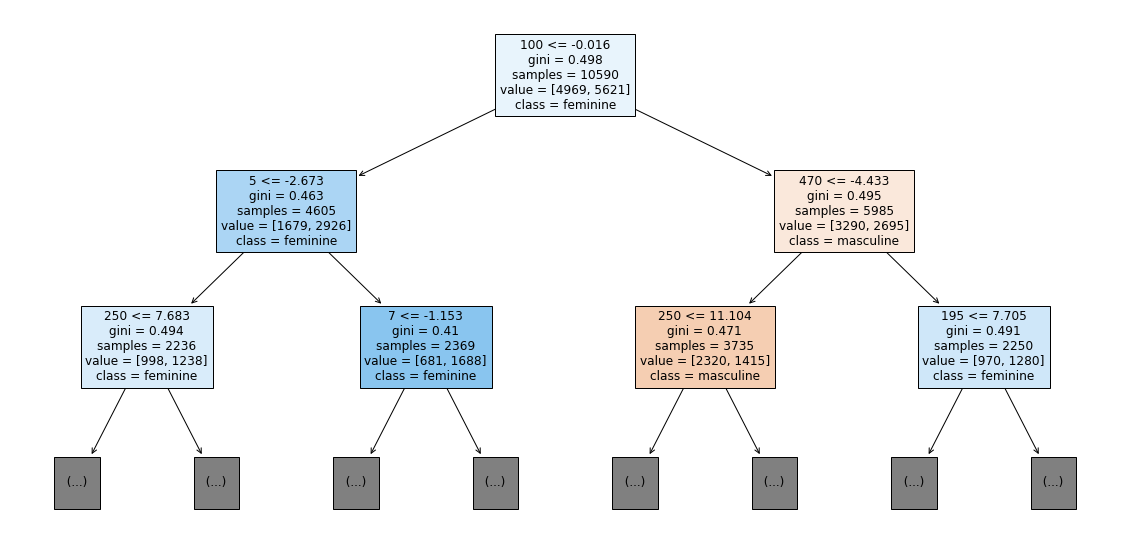

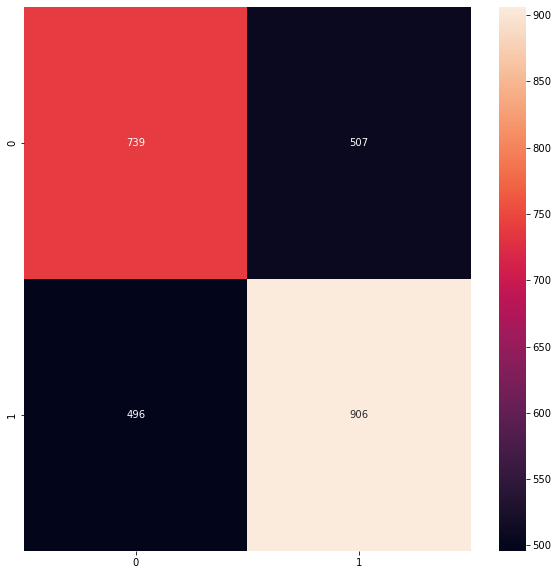

Experiment 2:

Most important features: [466, 5, 507, 57, 234, 250, 379, 390, 511, 432]
Precision: 0.659877800407332
Recall: 0.6849894291754757
F1 score: 0.6721991701244814
Accuracy: 0.7505919494869772


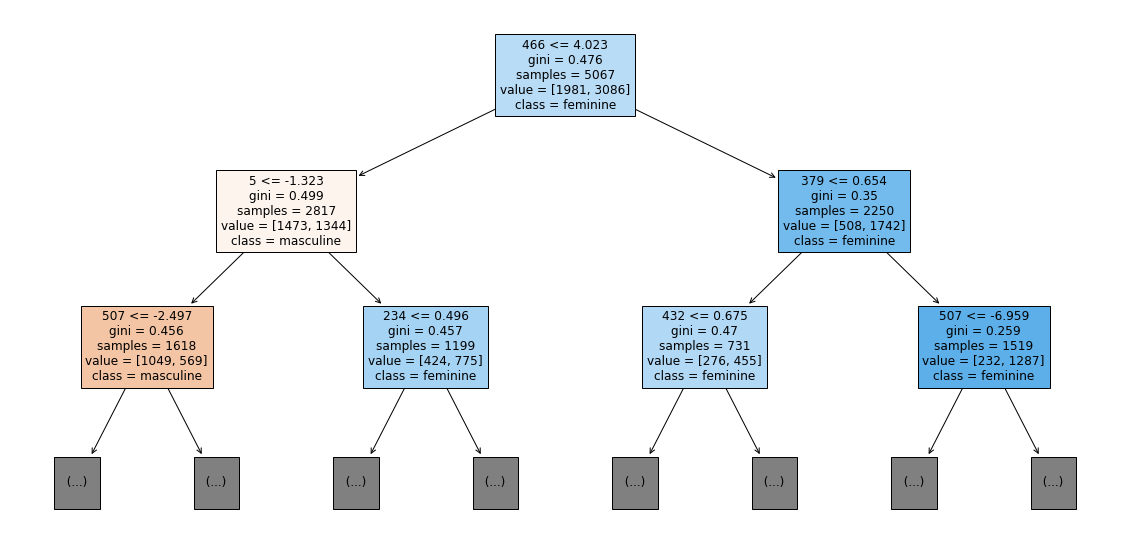

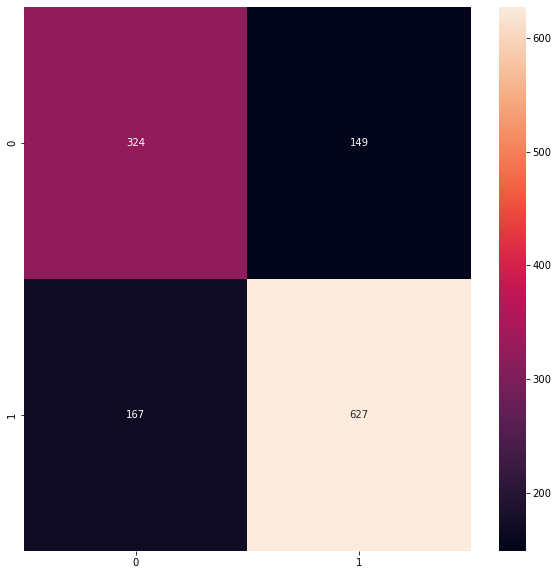

Experiment 3:

Most important features: [245, 192, 195, 377, 162, 507, 133, 117, 121, 487]
Precision: 0.6875732708089097
Recall: 0.6883802816901409
F1 score: 0.6879765395894429
Accuracy: 0.7282247765006385


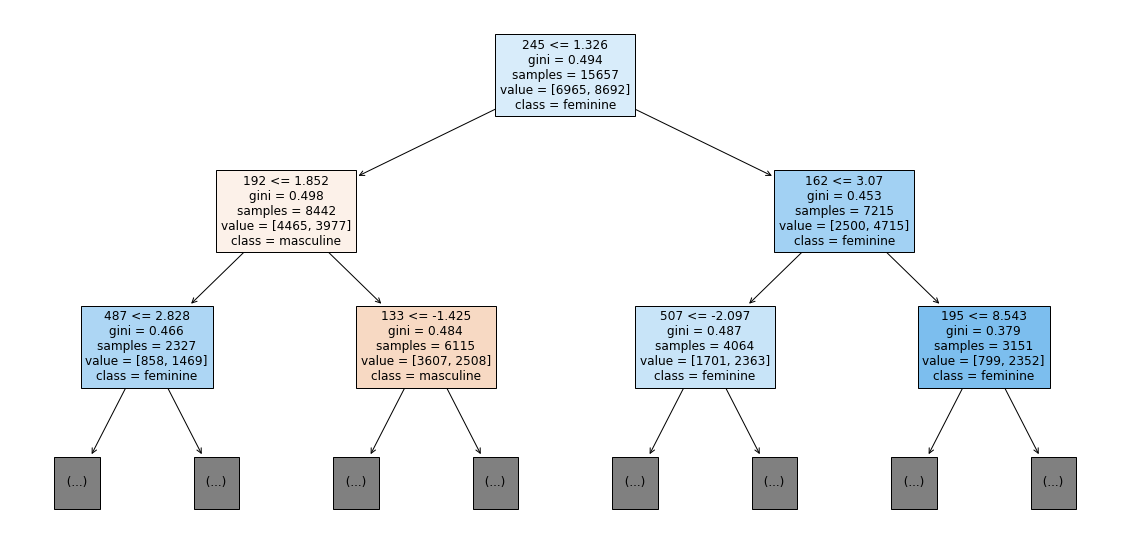

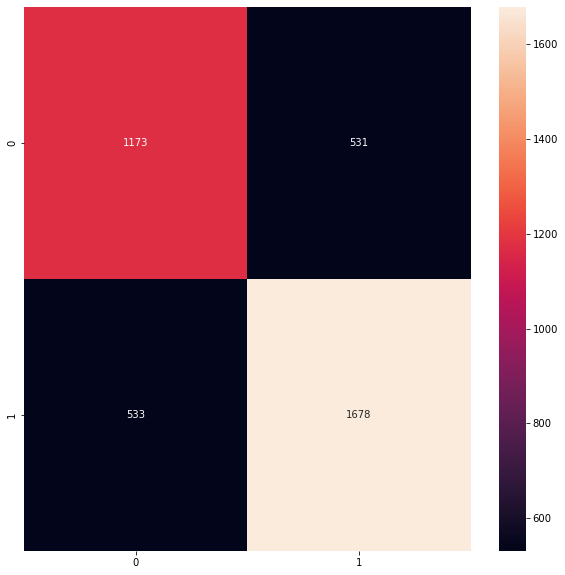

In [6]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results[i]['precision']}")
    print(f"Recall: {results[i]['recall']}")
    print(f"F1 score: {results[i]['f1']}")
    print(f"Accuracy: {results[i]['accuracy']}")

    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(results[i]["tree"], max_depth=2, feature_names=X_gd_N.columns, class_names=["masculine", "feminine"], filled=True)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(results[i]["cm"], annot=True, fmt="d")
    plt.show()

    

In [7]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results[0]["importances"])[::-1][:10])
adj = set(np.argsort(results[1]["importances"])[::-1][:10])
both = set(np.argsort(results[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {250, 5}
nouns and both: {162, 195, 245}
adj and both: {507}
all: set()


#### 2. Random Forest

In [8]:
# Do the same with Random Forest Classifier
# Execution time: ~ 2.15 min
results_rf = []

for i in range(3):

    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a random forest classifier with 100 trees
    clf = RandomForestClassifier(random_state=42, n_estimators=100)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results_rf.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    results_rf[i]["precision"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,0])
    results_rf[i]["recall"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][0,1])
    results_rf[i]["f1"] = 2 * results_rf[i]["precision"] * results_rf[i]["recall"] / (results_rf[i]["precision"] + results_rf[i]["recall"])
    results_rf[i]["accuracy"] = (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,1]) / np.sum(results_rf[i]["cm"])

    # Store the importance of each feature
    results_rf[i]["importances"] = clf.feature_importances_
    

Experiment 1:

Most important features: [100, 245, 195, 316, 192, 403, 377, 507, 117, 121]
Precision: 0.8215962441314554
Recall: 0.702247191011236
F1 score: 0.7572479446127217
Accuracy: 0.7881419939577039


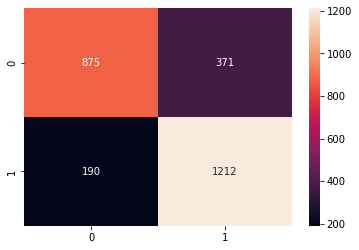

Experiment 2:

Most important features: [466, 503, 250, 439, 245, 133, 234, 121, 432, 38]
Precision: 0.9670886075949368
Recall: 0.8076109936575053
F1 score: 0.880184331797235
Accuracy: 0.9179163378058406


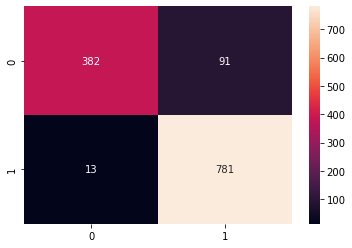

Experiment 3:

Most important features: [245, 507, 192, 121, 250, 195, 377, 5, 466, 133]
Precision: 0.8794373744139317
Recall: 0.7705399061032864
F1 score: 0.8213950578667499
Accuracy: 0.8541507024265645


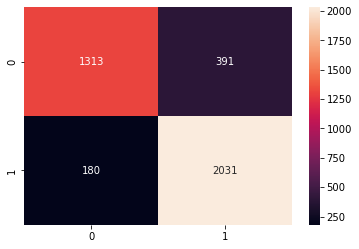

In [9]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results_rf[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results_rf[i]['precision']}")
    print(f"Recall: {results_rf[i]['recall']}")
    print(f"F1 score: {results_rf[i]['f1']}")
    print(f"Accuracy: {results_rf[i]['accuracy']}")

    # Plot confusion matrix
    sns.heatmap(results_rf[i]["cm"], annot=True, fmt="d")
    plt.show()


In [10]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results_rf[0]["importances"])[::-1][:10])
adj = set(np.argsort(results_rf[1]["importances"])[::-1][:10])
both = set(np.argsort(results_rf[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {121, 245}
nouns and both: {192, 121, 195, 245, 377, 507}
adj and both: {133, 466, 245, 121, 250}
all: {121, 245}


# Number

In [393]:
df_nouns_nb = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gender"])
df_adj_nb = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns=["gender"])
df_both_nb = pd.concat([df_nouns_nb, df_adj_nb], ignore_index=True)

# assign -1 for singular and 1 for plural
df_nouns_nb.loc[df_nouns_nb['number']=="singular",'num']=-1
df_nouns_nb.loc[df_nouns_nb['number']=="plural",'num']=1

df_adj_nb.loc[df_adj_nb['number']=="singular",'num']=-1
df_adj_nb.loc[df_adj_nb['number']=="plural",'num']=1


df_both_nb.loc[df_both_nb['number']=="singular",'num']=-1
df_both_nb.loc[df_both_nb['number']=="plural",'num']=1


# target : number

Y_nb_N = df_nouns_nb["num"]
Y_nb_A = df_adj_nb["num"]
Y_nb_both = df_both_nb["num"]

# features : word embeddings dimensions
X_nb_N = df_nouns_nb.drop(columns=["Word", "number","Unnamed: 0", "num"])
X_nb_A = df_adj_nb.drop(columns=["Word", "number", "num"])
X_nb_both = df_both_nb.drop(columns = ["Word","number","Unnamed: 0", "num"] )

# split data into train and test sets
X_nb_N_train, X_nb_N_test, Y_nb_N_train, Y_nb_N_test = train_test_split(X_nb_N, Y_nb_N, test_size=0.2, random_state=42)
X_nb_A_train, X_nb_A_test, Y_nb_A_train, Y_nb_A_test = train_test_split(X_nb_A, Y_nb_A, test_size=0.2, random_state=42)
X_nb_both_train, X_nb_both_test, Y_nb_both_train, Y_nb_both_test = train_test_split(X_nb_both, Y_nb_both, test_size=0.2, random_state=42)

In [394]:
train_nb_features = [X_nb_N_train, X_nb_A_train, X_nb_both_train]
test_nb_features = [X_nb_N_test, X_nb_A_test, X_nb_both_test]
train_nb_targets = [Y_nb_N_train, Y_nb_A_train, Y_nb_both_train]
test_nb_targets = [Y_nb_N_test, Y_nb_A_test, Y_nb_both_test]

# LogisticRegression

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Experiment 1:



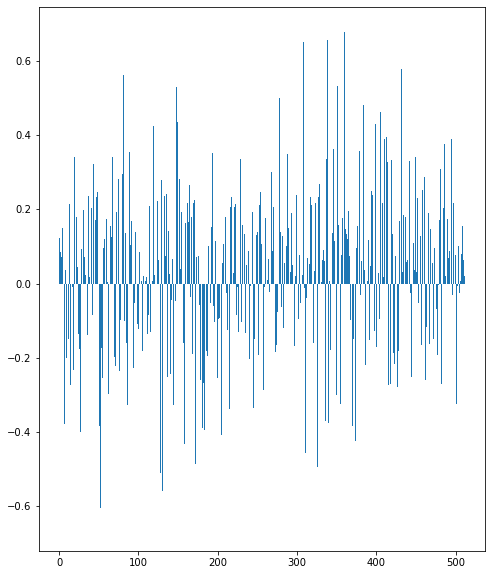

    Dimension  Importance
432       432    0.815406
360       360    0.785193
37         37    0.774620
338       338    0.751024
410       410    0.736789
208       208    0.667819
150       150    0.658465
384       384    0.654307
308       308    0.638164
481       481    0.594283
Experiment 2:



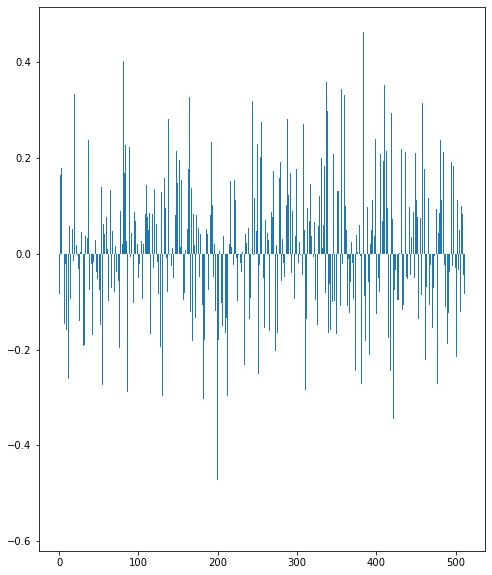

    Dimension  Importance
360       360    0.677876
208       208    0.668552
338       338    0.655645
308       308    0.650324
432       432    0.577339
81         81    0.563017
1           1    0.543201
351       351    0.533183
148       148    0.530394
278       278    0.499666
Experiment 3:



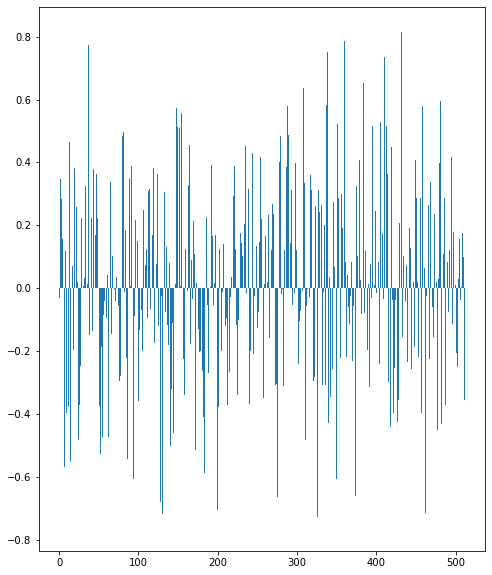

    Dimension  Importance
384       384    0.463263
359       359    0.447727
81         81    0.401875
337       337    0.359516
410       410    0.351725
356       356    0.343778
19         19    0.333924
360       360    0.331874
164       164    0.328197
455       455    0.327363


In [402]:

for t in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[t], test_nb_features[t], train_nb_targets[t], test_nb_targets[t]

# define the model
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model
    model.fit(X_train, Y_train)
# get importance
    importance = model.coef_[0]
    
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    
    print(f"Experiment {t+1}:\n")
    
    
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    print(importances.head(10))
    importances = pd.DataFrame(data={'Dimension': X_train.columns,'Importance': model.coef_[0]})
    importances = importances.sort_values(by='Importance', ascending=False)

 

# K Neighbors Classifier

Experiment 1:



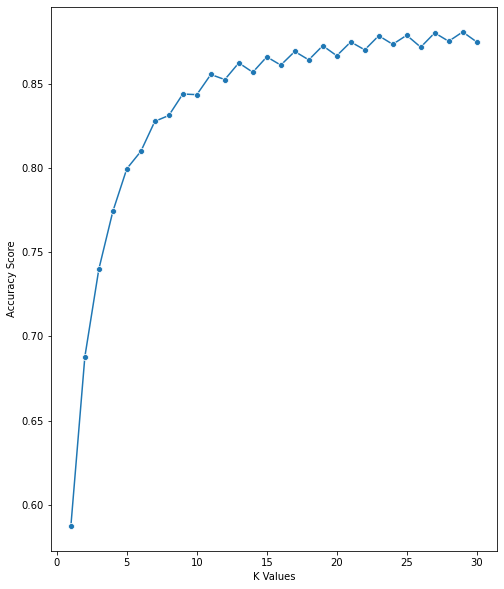

Experiment 2:



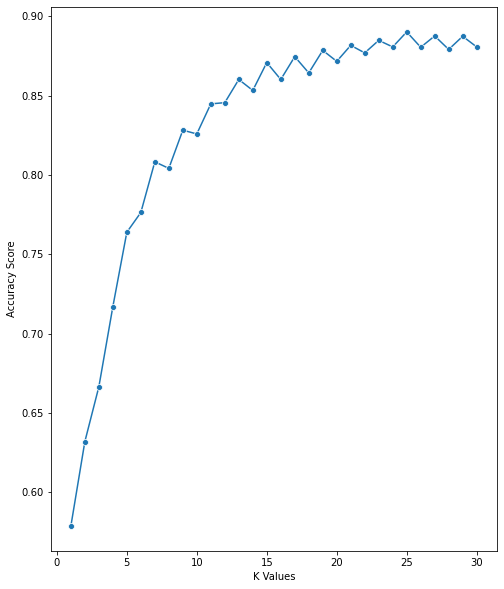

Experiment 3:



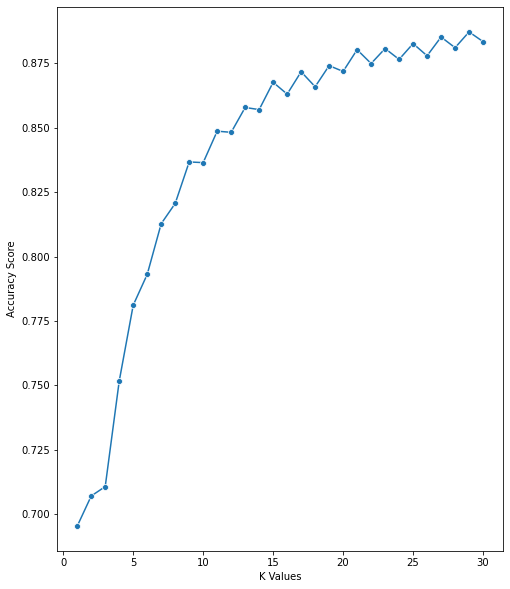

In [403]:
# Using Cross Validation to Get the Best Value of k
for t in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[t], test_nb_features[t], train_nb_targets[t], test_nb_targets[t]

    k_values = [i for i in range (1,31)]
    scores = []

    scaler = StandardScaler()
    X = scaler.fit_transform( X_train)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, Y_train, cv=5)
        scores.append(np.mean(score))

   
    print(f"Experiment {t+1}:\n")
    
    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")

    plt.show()
     
    

In [423]:
#Fitting and Evaluating the Model

# for noun the best_k is 15
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_nb_N_train, Y_nb_N_train)

y_pred = knn.predict(X_nb_N_test)

accuracy = accuracy_score(Y_nb_N_test, y_pred)
precision = precision_score(Y_nb_N_test, y_pred)
recall = recall_score(Y_nb_N_test, y_pred)

print("Accuracy for noun:", accuracy)
print("Precision for noun:", precision)
print("Recalln for noun :", recall)


# perform permutation importance
results = permutation_importance(knn, X_nb_N_train, Y_nb_N_train, scoring='accuracy')
# get importance
importance = results.importances_mean

#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
print("--"*30)

Accuracy for noun: 0.875
Precision for noun: 0.85995085995086
Recalln for noun : 0.7633587786259542
------------------------------------------------------------


In [427]:
importances = pd.DataFrame(data={'Dimension': X_nb_N_train.columns,'Importance': results.importances_mean})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(10)

,Dimension,Importance
250,250,0.002493
384,384,0.002474
67,67,0.002285
371,371,0.002247
254,254,0.002096
155,155,0.002059
461,461,0.001926
310,310,0.001889
25,25,0.001832
172,172,0.001832


In [429]:

# for adj the best_k is 25

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_nb_A_train, Y_nb_A_train)

y_pred = knn.predict(X_nb_A_test)

accuracy = accuracy_score(Y_nb_A_test, y_pred)
precision = precision_score(Y_nb_A_test, y_pred)
recall = recall_score(Y_nb_A_test, y_pred)



print("Accuracy for adj:", accuracy)
print("Precision for adj:", precision)
print("Recalln for adj :", recall)


print("--"*30)

# for noun and adj the best_k is 27

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_nb_both_train, Y_nb_both_train)

y_pred = knn.predict(X_nb_both_test)

accuracy = accuracy_score(Y_nb_both_test, y_pred)
precision = precision_score(Y_nb_both_test, y_pred)
recall = recall_score(Y_nb_both_test, y_pred)

print("Accuracy for noun and adj:", accuracy)
print("Precision for noun and adj:", precision)
print("Recalln for noun and  adj :", recall)





Accuracy for adj: 0.9021310181531176
Precision for adj: 0.9195121951219513
Recalln for adj : 0.8055555555555556
------------------------------------------------------------
Accuracy for noun and adj: 0.8929757343550447
Precision for noun and adj: 0.8908507223113965
Recalln for noun and  adj : 0.7968413496051687
